### Libraries

In [11]:
library( rpart )
library( caret )
library( Amelia )

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


### Data

In [1]:
df <- read.csv( '../data/processed/employee-transportationdata.csv' )

In [2]:
str( df )

'data.frame':	3838 obs. of  6 variables:
 $ Employee.ID       : int  649 991 611 791 1247 3261 1224 1074 779 250 ...
 $ GENDER            : Factor w/ 3 levels "F","M","U": 1 2 1 2 2 1 1 2 2 2 ...
 $ Age               : int  31 53 37 41 87 34 65 70 41 52 ...
 $ MARITAL.STATUS    : Factor w/ 2 levels "M","S": 2 2 2 2 1 2 1 2 2 2 ...
 $ DriveDistanceMiles: num  0.34 0.41 0.49 0.5 0.5 0.53 0.61 0.67 0.76 0.85 ...
 $ Mode              : Factor w/ 3 levels "Bike","Car","Public Transportation": 2 3 1 1 3 1 3 3 1 2 ...


### Decision tree model

### Check for missing data

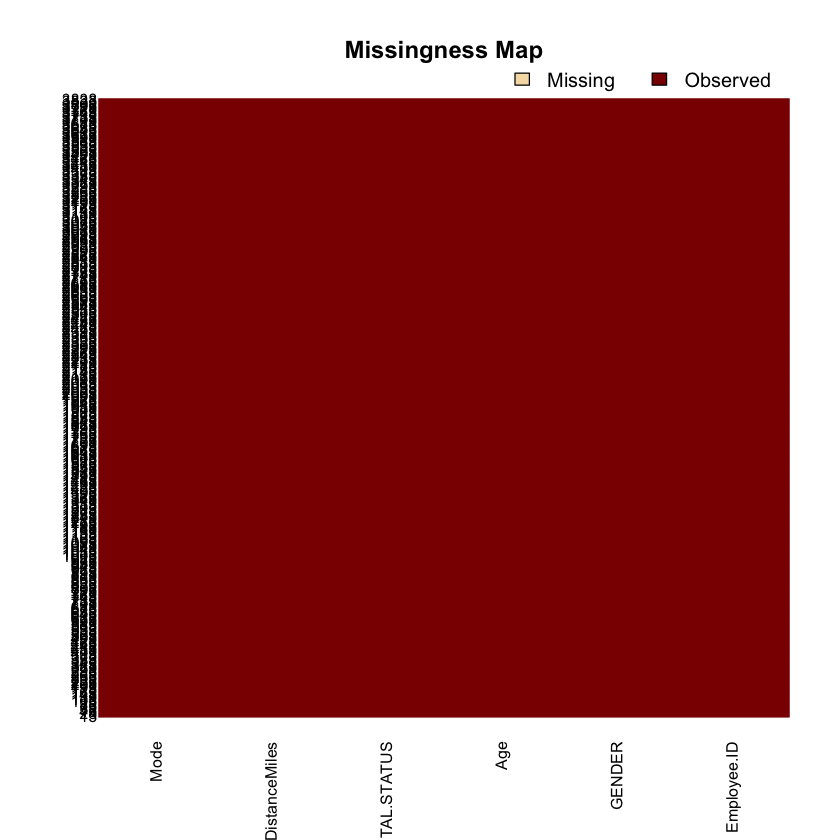

In [12]:
missmap( df )

### Partition the data

In [23]:
train <- createDataPartition( df$Mode, 1, p = 0.6, list = FALSE )

In [24]:
df.train <- df[train,]

In [25]:
df.test <- df[-train,]

In [26]:
nrow( df.train);nrow( df.test)

[1] 2304

[1] 1534

### Decision tree model

In [5]:
fit.tree <- rpart( Mode
     ~ GENDER
     + Age
     + MARITAL.STATUS
     + DriveDistanceMiles
     , data = df )

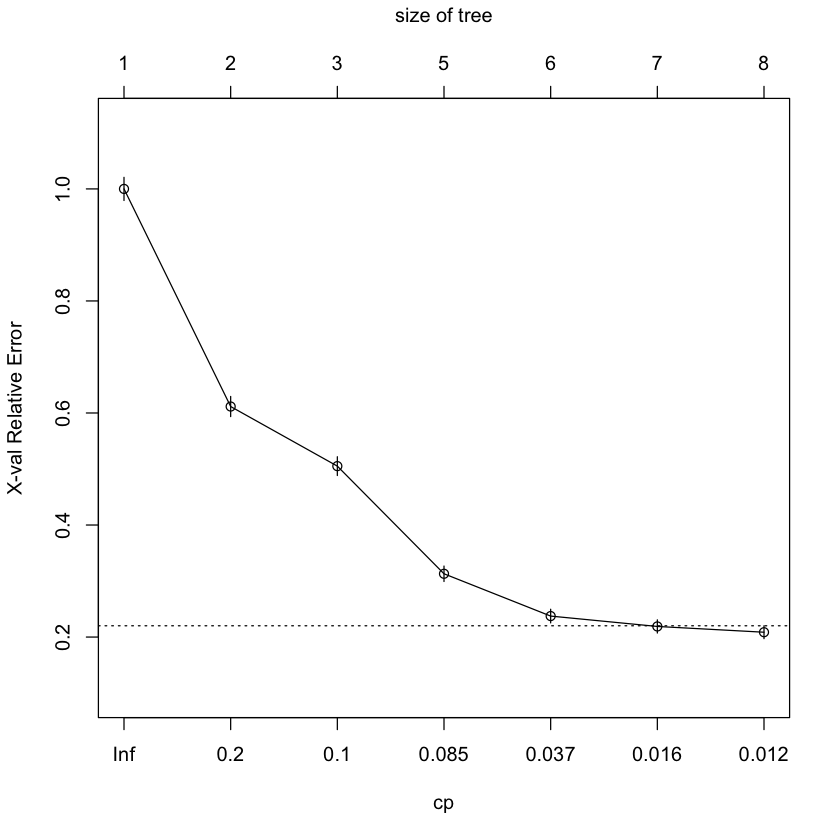

In [6]:
plotcp( fit.tree )